# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

# 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
    Which regions/countries have the highest amount of air pollution deaths and highest percentage of air pollution deaths due to household pollution?  How does the trend of total air pollution deaths from 1990-2017 compare to the trend of air pollution deaths due to household pollution?
    
    How have the % of total deaths from air pollution changed over the period of 1990-2017 throughout the world?  How have the percentage of air pollution deaths from household pollution changed from 1990-2017?  I'll look at world statistics, and also at the countries with the most air pollution deaths to compare.  I found two datasets from the site kaggle.com. 
    The first dataset has a large number of variables exploring different forms of death including household air pollution from solid fuels and total air pollution deaths for most of the countries around the world from 1990-2017.  
    The second dataset explores the total percentage of total deaths by air pollution, and features the same time period of 1990-2017 and the same group of countries as the first dataset. 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- ****Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- ****Extract data from a SQL database


#### **Dataset 1**

Type: CSV File. 

Method:  Downloaded data manually from Kaggle.com (https://www.kaggle.com/datasets/pavan9065/air-pollution)

Dataset variables:

*   *Variable 1  Entity (country)
*   *Variable 2  Code (abbreviation for country)
*   *Variable 3  Year (recorded year)
*   *Variable 4  Unsafe water source (death count by u.w.s)
*   *Variable 5  Unsafe sanitation (death count by u.s)
*   *Variable 6  No access to handwashing facility (death count by n.a.t.h.f)
*   *Variable 7  Household air pollution from solid fuels (death count by h.a.p.f.s.f)
*   *Variable 8  Non-exclusive breastfeeding (death count by n.e.b)
*   *Variable 9  Discontinued breastfeeding (death count by d.b)
*   *Variable 10 Child wasting (death count by c.w)
*   *Variable 11 High systolic blood pressure (death count by h.s.b.p)
*   *Variable 12 Smoking (death count)
*   *Variable 13 Iron deficiency (death count)
*   *Variable 14 Vitamin A deficiency (death count)
*   *Variable 15 Low bone mineral density (death count)
*   *Variable 16 Air pollution (death count)
*   *Variable 17 Outdoor air pollution (death count)
*   *Variable 18 Diet high in sodium (death count)
*   *Variable 19 Diet low in whole grains (death count)
*   *Variable 20 Diet low in nuts and seeds (death count)

Why I picked this dataset: I chose this dataset because at first I didn't know exactly what I wanted to be looking at with air pollution data, I just wanted to have different options to see what data would seem interesting to me. I found as I explored the data that the household air pollution from solid fuels variable was very interesting since it seemed to significantly go down from 1990-2017 in most countries even as total air pollution deaths seemed to rise.  I also wanted to keep the air pollution (death count) so I can compare the percentage of air pollution deaths that resulted from household air pollution as opposed to outdoor air pollution.

In [1]:
## Importing packages needed for Assessing, Cleaning and Visualizing the Data.
import pandas as pd
import os
import csv
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Loading downloaded dataset into Jupyter Notebook
df_risk = pd.read_csv('number-of-deaths-by-risk-factor.csv')

In [3]:
## Taking a quick look at the dataset
df_risk

,Entity,Code,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,29173.611201,6561.054957,873.485341,9769.844533,388.130434,27263.127914,4568.91,2798.560245,11866.235572,7640.628526
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,30074.760910,6731.972560,1040.047422,11433.769491,405.577931,30495.561499,5080.29,2853.301679,12335.961682,7968.311853
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,30809.491169,6889.328118,1101.764645,12936.955863,415.349195,33323.161401,5499.23,2880.025765,12672.950191,8244.368430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,4254.282075,2977.649750,3913.210510,7613.561005,1037.968042,59.150493,7703.062474,...,11077.327076,9099.552194,382.544583,1130.714398,238.297856,9593.033931,2053.58,1018.389001,2687.636261,2409.930182
6464,Zimbabwe,ZWE,2014,4098.769691,2856.426187,3809.245683,7429.446352,972.886327,54.334796,7401.059382,...,11015.121668,8902.223776,353.386096,1094.267123,237.534426,9387.193480,2030.92,1016.407438,2654.381923,2399.261581
6465,Zimbabwe,ZWE,2015,3921.291358,2717.735794,3688.442102,7267.029297,912.248164,50.255551,7100.476546,...,11005.409819,8818.570004,332.355373,1068.810953,240.663191,9189.336702,1994.91,1019.971539,2635.950107,2398.525219
6466,Zimbabwe,ZWE,2016,3802.257512,2624.315858,3603.179799,7134.595677,875.706009,47.719473,6823.766727,...,11096.182440,8758.486720,319.692576,950.215259,244.719399,9092.577378,2030.88,1032.181216,2641.376815,2417.422521


#### Dataset 2

Type: CSV File
      
Method: Extract data from a SQL database (data originally from (https://www.kaggle.com/datasets/pavan9065/air-pollution)

Dataset variables:

*   *Variable 1  Entity (country)
*   *Variable 2  Code (abbreviation for country)
*   *Variable 3  Year (recorded year)
*   *Variable 4  Air pollution (total)(IHME) (% of deaths by air pollution by Institute for Health Metrics)

Why I picked this dataset: I chose this dataset mostly for Variable 4 which is very interesting to me.  It is fascinating to look at the percentage of total deaths that have resulted from air pollution for the world and it's countries.  I also found that since the data is from the exact same source, that it would be eventually easier to merge the two datasets since they have the exact same variables (Variables 1-3) that I can join the two datasets on.

In [4]:
## Importing create_engine, text from sqlalchemy
from sqlalchemy import create_engine, text

In [5]:
## Loading dataset into Jupyter Notebook
df_share = pd.read_csv('share-deaths-air-pollution.csv')

In [6]:
## Taking a look at the dataset
df_share.head()

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"
0,Afghanistan,AFG,1990,13.56
1,Afghanistan,AFG,1991,13.19
2,Afghanistan,AFG,1992,13.05
3,Afghanistan,AFG,1993,12.88
4,Afghanistan,AFG,1994,12.80


In [7]:
## Creating SQLAlchemy Engine and empty deathrates database
engine = create_engine('sqlite:///sharedeaths.db')

In [8]:
## Storing dataframe in dr_table in sharedeaths database
df_share.to_sql('dr_table', engine, index=False, if_exists='replace')

In [9]:
## Reading the data in the database back into the pandas DataFrame
df_share = pd.read_sql(sql=text('SELECT * FROM dr_table'), con=engine.connect())

In [10]:
df_share.head()

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"
0,Afghanistan,AFG,1990,13.56
1,Afghanistan,AFG,1991,13.19
2,Afghanistan,AFG,1992,13.05
3,Afghanistan,AFG,1993,12.88
4,Afghanistan,AFG,1994,12.80


# 2. Assess data

## Quality Issue 1 for Risk dataset: Dealing with the NaN values in the "Code" column.

In [11]:
## Inspecting DataFrame 1 (df_risk) visually
df_risk.sample (10, random_state=1)

,Entity,Code,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
2704,India,IND,2006,654674.267672,497423.076988,329214.680073,546837.609398,61488.866313,1990.621725,454782.776053,...,1.006446e+06,725157.823295,32632.888106,136778.751752,60977.123260,1.025865e+06,523756.73,129760.854354,349981.600705,259156.048847
4036,Nicaragua,NIC,1994,1671.899851,1258.358767,643.989745,1254.956149,629.484785,96.346139,2171.156709,...,2.584395e+03,1028.963280,49.982610,301.207321,54.614387,1.496008e+03,246.01,378.422653,670.175640,528.737523
1731,Eastern Europe,NaN,2013,262.142495,210.598837,758.984791,6065.183210,340.385257,15.508312,1385.058882,...,9.258714e+05,454167.166818,69.902700,23.910430,6313.444103,1.731141e+05,167953.66,154463.617469,290295.328278,218995.167023
1307,Colombia,COL,2009,664.738985,201.798657,441.987475,3709.206444,231.110984,21.199055,2167.145755,...,3.642427e+04,18821.779123,96.255749,90.373417,760.592477,1.203660e+04,8440.25,8545.222404,9144.442571,8288.657109
4899,Saudi Arabia,SAU,2017,94.445515,15.543322,128.642367,21.980592,11.083015,1.412415,90.696029,...,1.946958e+04,5603.741780,20.927035,10.047194,662.357859,8.731612e+03,8800.38,3174.284543,7634.405672,5579.151549
1784,Ecuador,ECU,2010,288.345776,140.289703,317.883078,581.497390,143.768228,9.109412,1302.343187,...,1.067360e+04,4777.003710,50.693885,122.485779,415.052389,3.872813e+03,3306.65,2804.020876,3150.228081,2306.897524
6236,Venezuela,VEN,2010,701.019832,236.974413,308.224947,142.054172,284.035522,24.341276,1307.732831,...,2.748474e+04,12980.005491,60.272302,149.366437,501.073952,7.583504e+03,7491.72,4778.731866,6305.165980,6475.047462
2687,Iceland,ISL,2017,0.135715,0.090809,0.690952,0.810299,0.065282,0.009793,1.394035,...,3.740255e+02,322.959717,0.008428,0.041967,16.593886,5.884219e+01,58.93,58.127528,105.794997,91.985074
6227,Venezuela,VEN,2001,1200.481001,436.526371,400.045178,179.377319,486.134928,55.138458,2276.168124,...,2.208790e+04,12110.659092,52.136617,314.336281,414.689330,5.875315e+03,5732.31,3920.673420,5185.014157,5109.661649
3658,Mauritius,MUS,2008,4.896928,3.453959,2.564433,79.886553,2.663900,0.163389,27.937407,...,2.211911e+03,1027.035333,2.843349,1.213160,20.756836,6.670821e+02,588.75,898.174842,764.826306,560.450644


## It appears that most of the Entitys are countries.  I do notice a Code that is NaN, and that says "Eastern Europe" which appears to be a region.  Will inspect more NaN values to see if they are all regions rather than countries.

In [12]:
## Creating dataframe to see how many null value Codes are regions/continents since I want only countries.
df_risk2 = df_risk[df_risk['Code'].isnull()]

In [13]:
df_risk2['Entity'].sample(30, random_state=2)

6310                            Western Europe
1714                            Eastern Europe
1858                                   England
3150               Latin America and Caribbean
4249                          Northern Ireland
5482                        Sub-Saharan Africa
5469                        Sub-Saharan Africa
5335    Southeast Asia, East Asia, and Oceania
6298                                     Wales
6345                Western Sub-Saharan Africa
5342    Southeast Asia, East Asia, and Oceania
5303                            Southeast Asia
1189                Central Sub-Saharan Africa
1172                     Central Latin America
1079                              Central Asia
3159               Latin America and Caribbean
1749                Eastern Sub-Saharan Africa
1173                     Central Latin America
1023                                 Caribbean
6313                            Western Europe
1081                              Central Asia
3161         

In [14]:
df_risk[df_risk['Entity'] == "Ireland"]

,Entity,Code,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
2800,Ireland,IRL,1990,0.468725,0.989443,10.423041,126.975890,1.419679,0.066511,9.669412,...,9008.537156,9252.889090,0.611870,0.873052,125.018377,1842.286629,1732.33,983.003828,2049.439978,2119.122460
2801,Ireland,IRL,1991,0.506247,1.038981,10.376174,115.591254,1.246500,0.069090,8.665547,...,8822.909023,9091.180971,0.794404,0.737964,121.951000,1811.908030,1713.29,970.842632,1979.896842,2074.865026
2802,Ireland,IRL,1992,0.528427,1.099219,10.446778,107.715066,1.006658,0.064173,7.649376,...,8792.675049,9064.050816,0.525759,0.598422,121.827074,1807.551372,1717.03,972.935641,1940.816743,2057.688460
2803,Ireland,IRL,1993,0.532858,1.126280,10.740317,101.568293,0.939338,0.064638,7.076631,...,8806.244141,9079.422084,0.221335,0.551089,124.397551,1817.317269,1733.30,991.257298,1914.925984,2059.607304
2804,Ireland,IRL,1994,0.527275,1.134373,10.976590,92.802737,0.919285,0.065776,6.772971,...,8590.416210,8840.363204,0.588242,0.520799,123.270532,1771.640501,1696.12,983.042949,1834.651791,1999.027638
2805,Ireland,IRL,1995,0.538641,1.180119,11.625502,88.091708,1.056234,0.074212,7.025020,...,8683.927149,8930.258901,0.305014,0.580584,125.589474,1801.570441,1731.32,1018.196608,1825.443867,2015.257717
2806,Ireland,IRL,1996,0.484395,1.079534,11.756073,80.192257,1.094657,0.074756,7.445076,...,8404.910838,8642.705337,0.680190,0.586002,125.521946,1756.043436,1693.40,1007.047050,1734.527687,1937.990291
2807,Ireland,IRL,1997,0.405656,0.915402,12.031606,75.483110,1.125208,0.069795,8.059060,...,8259.811218,8513.757999,0.733749,0.600487,133.270767,1742.385853,1684.53,1022.132843,1676.482786,1893.156764
2808,Ireland,IRL,1998,0.306133,0.695294,12.162958,68.741857,1.080243,0.056619,8.379567,...,8095.410285,8347.341867,0.582422,0.567430,140.644766,1720.559899,1669.31,1032.862893,1616.516743,1845.971445
2809,Ireland,IRL,1999,0.363601,0.824769,12.656468,64.823832,1.184791,0.073244,8.966098,...,8029.493347,8239.299138,0.494325,0.620511,149.531644,1711.317059,1663.87,1052.731835,1577.406982,1807.591441


##  For Wales, England, Scotland, I will alter the codes from NaN to WAL, ENG and SCO.  Ireland appears to already have a code.

## Issue and justification: Since I am only trying to compare countries, I need to make sure that all of the countries have a Code.  That is why I will add Codes to rows for Wales, England and Scotland

## **Quality Issue 2: Risk Dataset**: Dropping all rows that are regions from the dataset.

### Issue and Justification:  Will drop all of the rows with NaN values (in the column "Code") so that the dataset only shows countries for the sake of my analysis.

In [15]:
df_risk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 112 to 6355
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    980 non-null    object 
 1   Code                                      0 non-null      object 
 2   Year                                      980 non-null    int64  
 3   Unsafe water source                       980 non-null    float64
 4   Unsafe sanitation                         980 non-null    float64
 5   No access to handwashing facility         980 non-null    float64
 6   Household air pollution from solid fuels  980 non-null    float64
 7   Non-exclusive breastfeeding               980 non-null    float64
 8   Discontinued breastfeeding                980 non-null    float64
 9   Child wasting                             980 non-null    float64
 10  Child stunting                     

## Tidiness Issue 1 for Risk dataset: Choosing which columns to keep for my analysis (too many columns)

In [16]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Code                                      5488 non-null   object 
 2   Year                                      6468 non-null   int64  
 3   Unsafe water source                       6468 non-null   float64
 4   Unsafe sanitation                         6468 non-null   float64
 5   No access to handwashing facility         6468 non-null   float64
 6   Household air pollution from solid fuels  6468 non-null   float64
 7   Non-exclusive breastfeeding               6468 non-null   float64
 8   Discontinued breastfeeding                6468 non-null   float64
 9   Child wasting                             6468 non-null   float64
 10  Child stunting                      

In [17]:
df_risk.describe()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,...,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6.468000e+03,6.467000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,2003.500000,3.156632e+04,2.337436e+04,1.893305e+04,4.308421e+04,6231.427632,409.110423,4.344643e+04,1.176772e+04,3.094801e+04,...,1.743832e+05,1.335483e+05,1878.745701,11908.622027,4579.055654,9.573551e+04,5.557313e+04,5.424067e+04,5.334881e+04,3.496704e+04
std,8.078372,1.527731e+05,1.144930e+05,8.981037e+04,1.877345e+05,28517.846341,1874.989431,2.022367e+05,5.824891e+04,1.342946e+05,...,6.809915e+05,5.299315e+05,9011.891580,58801.648611,18884.513384,3.909335e+05,2.298038e+05,2.434373e+05,2.097153e+05,1.359432e+05
min,1990.000000,8.650193e-03,6.495981e-03,7.791357e-02,2.058533e-02,0.003816,0.000520,1.017127e-01,1.400828e-03,3.266384e-01,...,2.102607e+01,1.170748e+01,0.005499,0.003465,0.381232,8.524593e+00,4.830000e+00,2.673823e+00,9.317592e+00,5.188788e+00
25%,1996.750000,1.019665e+01,4.603845e+00,1.688487e+01,8.759783e+01,4.633254,0.264366,4.137245e+01,1.863717e+00,1.445628e+02,...,2.665313e+03,1.292926e+03,2.256209,1.896386,40.602658,1.076837e+03,5.537050e+02,3.556373e+02,7.987349e+02,5.533485e+02
50%,2003.500000,2.790317e+02,1.601965e+02,2.524991e+02,1.091671e+03,102.428307,6.619327,7.303462e+02,7.787362e+01,1.220717e+03,...,1.099331e+04,5.935789e+03,31.990666,70.490245,246.750756,6.125098e+03,2.242020e+03,1.945638e+03,3.504309e+03,2.279157e+03
75%,2010.250000,5.301718e+03,3.832344e+03,3.811442e+03,9.161964e+03,1367.827277,78.279446,1.023454e+04,1.971596e+03,8.708146e+03,...,4.732284e+04,3.163810e+04,421.383585,2081.946722,1096.103891,2.272736e+04,1.282150e+04,9.691376e+03,1.446369e+04,1.003880e+04
max,2017.000000,2.111659e+06,1.638021e+06,1.239519e+06,2.708905e+06,514102.351577,34850.395532,3.365309e+06,1.001277e+06,1.976613e+06,...,1.044082e+07,7.099111e+06,125242.948306,986994.996195,327314.262607,4.895476e+06,3.408878e+06,3.196514e+06,3.065589e+06,2.062522e+06


### Many of the columns have numbers below zero.  I will be dropping many of the columns to focus on only a few factors and will also drop countries that have numbers below zero. 

### Issue and Justification: Only going to keep: Entity, Code, Year, Household Air Pollution, Secondhand smoke, Smoking, Air pollution and Outdoor air pollution.  I have to keep my analysis simple and connected directly to forms of pollution.

## Tidiness Issue 2 for Risk dataset: Renaming the columns to make them more compact.

In [18]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Code                                      5488 non-null   object 
 2   Year                                      6468 non-null   int64  
 3   Unsafe water source                       6468 non-null   float64
 4   Unsafe sanitation                         6468 non-null   float64
 5   No access to handwashing facility         6468 non-null   float64
 6   Household air pollution from solid fuels  6468 non-null   float64
 7   Non-exclusive breastfeeding               6468 non-null   float64
 8   Discontinued breastfeeding                6468 non-null   float64
 9   Child wasting                             6468 non-null   float64
 10  Child stunting                      

### Issue and Justification: Shorter column names make the table look more compact and cleaner.  Also makes it easier to do analysis on them. 

## Tidiness Issue 3 for Risk dataset: Dropping countries that have values below 1 in the Household air pollution column.

### I will look at the min values for one of the columns I am keeping: Household air pollution from solid fuels, to see which countries to drop.

In [19]:
## Creating dataframe for Household air... below 1 to see which countries to drop
df_risk3 = df_risk[df_risk['Household air pollution from solid fuels'] < 1].loc[:, 'Household air pollution from solid fuels'] 

In [20]:
## Checking to see some of the countries to drop
df_risk3.sample(40).sort_values()

4673    0.021216
4670    0.022745
4656    0.028499
4654    0.033705
4651    0.041661
4649    0.049944
4648    0.055347
502     0.207872
500     0.208835
503     0.209272
495     0.255395
160     0.280613
157     0.286470
493     0.315551
154     0.322957
492     0.349888
150     0.354912
2293    0.363146
2291    0.372760
2290    0.385225
491     0.393737
810     0.425576
146     0.427205
145     0.464805
2286    0.467689
809     0.479824
142     0.521234
140     0.528883
3219    0.589057
2281    0.605400
484     0.617985
3218    0.635431
804     0.649231
2279    0.653658
2278    0.672504
802     0.756856
2274    0.777402
2684    0.867493
2271    0.874598
2683    0.906253
Name: Household air pollution from solid fuels, dtype: float64

In [21]:
print(df_risk['Entity'].iloc[[4675, 499, 155, 2295, 140, 807, 2281, 3218, 2686]])

4675        Qatar
499      Barbados
155       Andorra
2295    Greenland
140       Andorra
807        Brunei
2281    Greenland
3218      Lebanon
2686      Iceland
Name: Entity, dtype: object


## Issue and justification: I will be creating a new dataframe that does not have values below 1 for any of the pertinent columns so that it is easier to compare countries without tiny sample sizes.

## Quality Issue 1: Share dataset: Checking to see if Scotland, England, Wales have country codes like they did not in the Risks dataset. 

In [22]:
df_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              6412 non-null   object 
 1   Code                                5432 non-null   object 
 2   Year                                6412 non-null   int64  
 3   Air pollution (total) (IHME, 2019)  6412 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.5+ KB


In [23]:
## England, Scotland, Wales, and Northern Ireland are not found in the dataset.
df_share[df_share['Entity'] == "England"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"


In [24]:
df_share[df_share['Entity'] == "Scotland"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"


In [25]:
df_share[df_share['Entity'] == "Wales"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"


In [26]:
## Ireland, however, is found in the dataset.
df_share[df_share['Entity'] == "Ireland"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"
2800,Ireland,IRL,1990,5.88
2801,Ireland,IRL,1991,5.83
2802,Ireland,IRL,1992,5.79
2803,Ireland,IRL,1993,5.76
2804,Ireland,IRL,1994,5.68
2805,Ireland,IRL,1995,5.65
2806,Ireland,IRL,1996,5.58
2807,Ireland,IRL,1997,5.52
2808,Ireland,IRL,1998,5.47
2809,Ireland,IRL,1999,5.39


In [27]:
df_share[df_share['Entity'] == 'Northern Ireland']

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"


In [28]:
## Checking to see if United Kingdom is in the Share dataset instead
df_share[df_share['Entity'] == "United Kingdom"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"
6020,United Kingdom,GBR,1990,6.36
6021,United Kingdom,GBR,1991,6.28
6022,United Kingdom,GBR,1992,6.20
6023,United Kingdom,GBR,1993,6.17
6024,United Kingdom,GBR,1994,6.06
6025,United Kingdom,GBR,1995,6.01
6026,United Kingdom,GBR,1996,5.93
6027,United Kingdom,GBR,1997,5.85
6028,United Kingdom,GBR,1998,5.77
6029,United Kingdom,GBR,1999,5.67


## Issue and Justification: It appears that the Risk dataset has England, Scotland, Wales, and Northern Ireland...and the Share dataset only has United Kingdom and Ireland.  When I merge the two datasets...I will plug in the UK Air pollution(total) from the Share dataset into the rows for Eng, Scot., Wales and N.Ire since it is a percentage of deaths (not an actual number of deaths).

## Quality Issue 2: Share dataset: Deleting rows with NaN values in Code column (because they are regions). 

In [29]:
## Double checking to make sure all null values in Code for the Share dataset are regions that I won't need in my analysis. 
df_share2 = df_share[df_share['Code'].isnull()]

In [30]:
## It looks like they are all regions...except for "Upper-middle income" which is an economic gauge, and will not
## be needed in my analysis as well.
df_share2['Entity'].sample(30, random_state=2)

6254                Western Europe
1714                Eastern Europe
1998                        Europe
3150     Latin America & Caribbean
3801    Middle East & North Africa
5454            Sub-Saharan Africa
5441            Sub-Saharan Africa
5307                Southeast Asia
6102           Upper-middle income
6289    Western Sub-Saharan Africa
5314                Southeast Asia
5219                    South Asia
1665                     East Asia
1172    Central Sub-Saharan Africa
1079                  Central Asia
3159     Latin America & Caribbean
1749    Eastern Sub-Saharan Africa
1173    Central Sub-Saharan Africa
323                    Australasia
6257                Western Europe
1081                  Central Asia
3161     Latin America & Caribbean
1679                     East Asia
4222                 North America
4340                       Oceania
3778                    Micronesia
4364                       Oceania
3795    Middle East & North Africa
1159    Central Sub-

## Issue and Justification: Dropping all of the NaN values will eliminate all of the regions/non-country Entity's just like in the Risk dataset.

## Tidiness Issue 1: Share dataset: Making sure Column names are compact.

In [31]:
df_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              6412 non-null   object 
 1   Code                                5432 non-null   object 
 2   Year                                6412 non-null   int64  
 3   Air pollution (total) (IHME, 2019)  6412 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.5+ KB


## Issue and Justification: Need to rename Column 3...Make it AP_Deaths_%, the Column name is way too long.

## Tidiness Issue 2: Dropping the rows with countries that were dropped in the Risks dataset.  

In [32]:
## Making sure that the Air pollution(total) and Year columns have no values that are outliers or nonsensical.
## The Years are all between 1990 and 2017 which makes sense.
## The MIN is 1.55 and the MAX is 17.19, so I won't drop any other countries.
df_share.describe()

,Year,"Air pollution (total) (IHME, 2019)"
count,6412.000000,6412.000000
mean,2003.500000,7.636560
std,8.078377,2.461401
min,1990.000000,1.550000
25%,1996.750000,5.890000
50%,2003.500000,7.365000
75%,2010.250000,9.112500
max,2017.000000,17.190000


# 3. Clean data

In [33]:
# Making copies of the datasets to ensure the raw dataframes are not impacted
cleaned_risk = df_risk.copy()
cleaned_share = df_share.copy()

## Quality Issue 1 for Risk dataset: Dealing with the NaN values in the "Code" column.

## Changing the NaN values in the Codes for England, Wales, Scotland and Northern Ireland to actual codes.

In [34]:
## Looking up all of the rows that are for England so I can rename the codes.  I find that rows 1848-1875 are England.
cleaned_risk2 = cleaned_risk[cleaned_risk['Entity']== 'England']
print(cleaned_risk2)

       Entity Code  Year  Unsafe water source  Unsafe sanitation  \
1848  England  NaN  1990             7.969495           1.021348   
1849  England  NaN  1991             8.445471           1.052428   
1850  England  NaN  1992             9.142647           1.159326   
1851  England  NaN  1993            10.498958           1.364639   
1852  England  NaN  1994            11.529222           1.550863   
1853  England  NaN  1995            13.304881           1.874901   
1854  England  NaN  1996            15.289309           2.277538   
1855  England  NaN  1997            17.480957           2.761658   
1856  England  NaN  1998            20.085725           3.363496   
1857  England  NaN  1999            22.985179           4.073406   
1858  England  NaN  2000            26.520391           4.997217   
1859  England  NaN  2001            31.443286           6.338570   
1860  England  NaN  2002            38.005016           7.418946   
1861  England  NaN  2003            45.876157   

In [35]:
## Changing all of England's codes from NaN to ENG
cleaned_risk.loc[cleaned_risk['Entity'] == 'England', ['Code']] = 'ENG'

In [36]:
## Verifying the change
cleaned_risk1 = cleaned_risk[cleaned_risk['Entity']=='England']
print (cleaned_risk1)

       Entity Code  Year  Unsafe water source  Unsafe sanitation  \
1848  England  ENG  1990             7.969495           1.021348   
1849  England  ENG  1991             8.445471           1.052428   
1850  England  ENG  1992             9.142647           1.159326   
1851  England  ENG  1993            10.498958           1.364639   
1852  England  ENG  1994            11.529222           1.550863   
1853  England  ENG  1995            13.304881           1.874901   
1854  England  ENG  1996            15.289309           2.277538   
1855  England  ENG  1997            17.480957           2.761658   
1856  England  ENG  1998            20.085725           3.363496   
1857  England  ENG  1999            22.985179           4.073406   
1858  England  ENG  2000            26.520391           4.997217   
1859  England  ENG  2001            31.443286           6.338570   
1860  England  ENG  2002            38.005016           7.418946   
1861  England  ENG  2003            45.876157   

In [37]:
## Doing the same for each of the other countries
cleaned_risk.loc[cleaned_risk['Entity'] == 'Wales', ['Code']] = 'WAL'
cleaned_risk.loc[cleaned_risk['Entity'] == 'Northern Ireland', ['Code']] = 'NIR'
cleaned_risk.loc[cleaned_risk['Entity'] == 'Scotland', ['Code']] = 'SCO'
cleaned_risk.loc[cleaned_risk['Entity'] == 'England', ['Code']] = 'ENG'

In [38]:
## Validating that it worked
cleaned_risk3 = cleaned_risk[cleaned_risk['Code'].isnull()]
cleaned_risk3['Entity'].sample(30)

3139               Latin America and Caribbean
3379                            Low-middle SDI
3377                            Low-middle SDI
1110                            Central Europe
5313                            Southeast Asia
3740                                Middle SDI
5383               Southern Sub-Saharan Africa
1760                Eastern Sub-Saharan Africa
3733                                Middle SDI
5481                        Sub-Saharan Africa
4148                             North America
2506                                  High SDI
5317                            Southeast Asia
3151               Latin America and Caribbean
280                                Australasia
5855                    Tropical Latin America
3337                                   Low SDI
3746                                Middle SDI
5342    Southeast Asia, East Asia, and Oceania
3156               Latin America and Caribbean
1723                            Eastern Europe
3378         

## Justification: Wanted to make sure all of the country rows had a "Code" to make them universal.  All the region rows have a NaN in the "Code" column. 

## **Quality Issue 2: Risk Dataset**: Dropping all rows that are regions from the dataset.

In [39]:
cleaned_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Code                                      5600 non-null   object 
 2   Year                                      6468 non-null   int64  
 3   Unsafe water source                       6468 non-null   float64
 4   Unsafe sanitation                         6468 non-null   float64
 5   No access to handwashing facility         6468 non-null   float64
 6   Household air pollution from solid fuels  6468 non-null   float64
 7   Non-exclusive breastfeeding               6468 non-null   float64
 8   Discontinued breastfeeding                6468 non-null   float64
 9   Child wasting                             6468 non-null   float64
 10  Child stunting                      

In [40]:
## Dropping all of the regions from the dataset (they all have NaN values in the Code column).  Trying it out as cleaned_risk4 so that I don't accidentally delete rows that I didn't mean to
cleaned_risk4 = cleaned_risk.dropna(axis = 0, subset =['Code'], how="any", thresh=1)

In [41]:
## Checking to see if the proper rows/number of rows were deleted
cleaned_risk4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5600 non-null   object 
 1   Code                                      5600 non-null   object 
 2   Year                                      5600 non-null   int64  
 3   Unsafe water source                       5600 non-null   float64
 4   Unsafe sanitation                         5600 non-null   float64
 5   No access to handwashing facility         5600 non-null   float64
 6   Household air pollution from solid fuels  5600 non-null   float64
 7   Non-exclusive breastfeeding               5600 non-null   float64
 8   Discontinued breastfeeding                5600 non-null   float64
 9   Child wasting                             5600 non-null   float64
 10  Child stunting                      

In [42]:
## Looks like the proper rows were deleted! 
cleaned_risk4.isnull().sum()

Entity                                         0
Code                                           0
Year                                           0
Unsafe water source                            0
Unsafe sanitation                              0
No access to handwashing facility              0
Household air pollution from solid fuels       0
Non-exclusive breastfeeding                    0
Discontinued breastfeeding                     0
Child wasting                                  0
Child stunting                                 0
Low birth weight for gestation                 0
Secondhand smoke                               0
Alcohol use                                    0
Drug use                                       0
Diet low in fruits                             0
Diet low in vegetables                         0
Unsafe sex                                     0
Low physical activity                          0
High fasting plasma glucose                    0
High total cholester

In [43]:
## Deleting the NaN rows in the cleaned_risk dataset
cleaned_risk = cleaned_risk.dropna(axis = 0, subset =['Code'], how="any", thresh=1)

### Justification: Since I am only comparing countries as part of my analysis, I do not need to have rows based on regions.  

## Tidiness Issue 1 for Risk dataset: Choosing which columns to keep for my analysis (too many columns).

### Dropping all of the columns I will not be doing analysis upon.  As stated before, I am only keeping: Only going to keep: Entity, Code, Year, Household Air Pollution, Secondhand smoke, Smoking, Air pollution and Outdoor air pollution.

In [44]:
## Looking at the info to get the full list of columns I will be dropping.
cleaned_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5600 non-null   object 
 1   Code                                      5600 non-null   object 
 2   Year                                      5600 non-null   int64  
 3   Unsafe water source                       5600 non-null   float64
 4   Unsafe sanitation                         5600 non-null   float64
 5   No access to handwashing facility         5600 non-null   float64
 6   Household air pollution from solid fuels  5600 non-null   float64
 7   Non-exclusive breastfeeding               5600 non-null   float64
 8   Discontinued breastfeeding                5600 non-null   float64
 9   Child wasting                             5600 non-null   float64
 10  Child stunting                      

In [45]:
## Making a copy of cleaned_risk so that I can test dropping columns properly before trying it on cleaned_risk dataset
cleaned_risk5 = cleaned_risk.copy()

In [46]:
cleaned_risk5.drop(columns = ["Unsafe water source", "Unsafe sanitation", "No access to handwashing facility"], inplace=True)

In [47]:
## The method worked, successfully dropped those columns. Will not drop them from the cleaned_risk dataset
cleaned_risk5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 6467
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5600 non-null   object 
 1   Code                                      5600 non-null   object 
 2   Year                                      5600 non-null   int64  
 3   Household air pollution from solid fuels  5600 non-null   float64
 4   Non-exclusive breastfeeding               5600 non-null   float64
 5   Discontinued breastfeeding                5600 non-null   float64
 6   Child wasting                             5600 non-null   float64
 7   Child stunting                            5600 non-null   float64
 8   Low birth weight for gestation            5600 non-null   float64
 9   Secondhand smoke                          5600 non-null   float64
 10  Alcohol use                         

In [48]:
## Dropping columns that I do not need.
cleaned_risk.drop(columns = ["Unsafe water source", "Unsafe sanitation", "No access to handwashing facility", "Non-exclusive breastfeeding", "Discontinued breastfeeding"], inplace=True)

In [49]:
## Dropping the rest of the columns I do not need.
cleaned_risk.drop(columns = ["Child wasting", "Child stunting", "Low birth weight for gestation", "Alcohol use", "Drug use"], inplace=True)
cleaned_risk.drop(columns = ["Diet low in fruits", "Diet low in vegetables", "Unsafe sex", "Low physical activity", "High fasting plasma glucose"], inplace=True)
cleaned_risk.drop(columns = ["High total cholesterol", "High body-mass index", "High systolic blood pressure", "Iron deficiency", "Vitamin A deficiency"], inplace=True)
cleaned_risk.drop(columns = ["Low bone mineral density", "Diet high in sodium", "Diet low in whole grains", "Diet low in nuts and seeds"], inplace=True)

In [50]:
## Making sure the drop worked. Success!
cleaned_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 6467
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5600 non-null   object 
 1   Code                                      5600 non-null   object 
 2   Year                                      5600 non-null   int64  
 3   Household air pollution from solid fuels  5600 non-null   float64
 4   Secondhand smoke                          5600 non-null   float64
 5   Smoking                                   5600 non-null   float64
 6   Air pollution                             5600 non-null   float64
 7   Outdoor air pollution                     5600 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 393.8+ KB


### **Tidiness Issue 2: Risk Dataset**: Renaming columns to make them more compact and easier to analyze.

In [51]:
## Renaming columns to make them shorter
cleaned_risk.rename(columns={"Household air pollution from solid fuels": "Household_AP", "Secondhand smoke": "Secondhand_smoke"}, inplace=True)
cleaned_risk.rename(columns={"Air pollution": "Air_pollution", "Outdoor air pollution": "Outdoor_AP"}, inplace=True)

In [52]:
## Verifying it worked
cleaned_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 6467
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5600 non-null   object 
 1   Code              5600 non-null   object 
 2   Year              5600 non-null   int64  
 3   Household_AP      5600 non-null   float64
 4   Secondhand_smoke  5600 non-null   float64
 5   Smoking           5600 non-null   float64
 6   Air_pollution     5600 non-null   float64
 7   Outdoor_AP        5600 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 393.8+ KB


### Justification: Looks cleaner and easier to type out shorter column names

## Tidiness Issue 3 for Risk dataset: Dropping countries that have values below 1 in the Household_AP column. 

In [53]:
cleaned_risk.describe()

,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP
count,5600.000000,5.600000e+03,5.600000e+03,5.600000e+03,5.600000e+03,5.600000e+03
mean,2003.500000,2.154419e+04,1.187471e+04,6.445143e+04,4.746137e+04,2.744901e+04
std,8.078469,1.634970e+05,8.871906e+04,4.713422e+05,3.527997e+05,2.064378e+05
min,1990.000000,2.058533e-02,2.890665e+00,1.170748e+01,8.524593e+00,4.830000e+00
25%,1996.750000,6.363045e+01,2.174314e+02,8.924905e+02,7.746837e+02,4.146625e+02
50%,2003.500000,6.355628e+02,8.785715e+02,4.108260e+03,4.105692e+03,1.623070e+03
75%,2010.250000,5.568800e+03,3.031849e+03,1.574595e+04,1.300200e+04,6.380797e+03
max,2017.000000,2.708905e+06,1.260994e+06,7.099111e+06,4.895476e+06,3.408878e+06


In [54]:
## Creating dataframe for Household air... below 1 to see which countries to drop
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Household_AP'] < 1)])

In [55]:
cleaned_risk.describe()

,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP
count,5458.00000,5.458000e+03,5.458000e+03,5.458000e+03,5.458000e+03,5.458000e+03
mean,2003.44137,2.210469e+04,1.218109e+04,6.611404e+04,4.868898e+04,2.815588e+04
std,8.06965,1.655732e+05,8.984534e+04,4.773211e+05,3.572773e+05,2.090594e+05
min,1990.00000,1.004884e+00,2.890665e+00,1.170748e+01,8.524593e+00,4.830000e+00
25%,1996.00000,7.549179e+01,2.405137e+02,1.041922e+03,8.750432e+02,4.789325e+02
50%,2003.00000,7.065585e+02,9.319564e+02,4.310773e+03,4.495265e+03,1.693335e+03
75%,2010.00000,5.735937e+03,3.141177e+03,1.608833e+04,1.333685e+04,6.564135e+03
max,2017.00000,2.708905e+06,1.260994e+06,7.099111e+06,4.895476e+06,3.408878e+06


In [56]:
## Creating a dataframe to see which countries had only partially values below 1.  
## Each country should have 28 entries and those with less should be dropped
cleaned_risk6 = cleaned_risk['Entity'].value_counts()< 28

In [57]:
## Only five countries had less than 28 entries
cleaned_risk6.value_counts()

False    192
True       5
Name: Entity, dtype: int64

In [58]:
## The five countries are Jordan, Iceland, Lebanon, Brunei and Barbados
cleaned_risk6

Malaysia      False
Singapore     False
Niger         False
Belgium       False
Tajikistan    False
              ...  
Jordan         True
Iceland        True
Lebanon        True
Brunei         True
Barbados       True
Name: Entity, Length: 197, dtype: bool

In [59]:
## Testing the dropping of Jordan.
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Entity'] == 'Jordan')])

In [60]:
## Jordan has been dropped successfully
cleaned_risk['Entity'].value_counts()

Malaysia      28
Singapore     28
Niger         28
Belgium       28
Tajikistan    28
              ..
Jamaica       28
Iceland       21
Lebanon       19
Brunei        15
Barbados       2
Name: Entity, Length: 196, dtype: int64

In [61]:
## Dropping the other four countries
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Entity'] == 'Iceland')])
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Entity'] == 'Lebanon')])
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Entity'] == 'Brunei')])
cleaned_risk = cleaned_risk.drop(cleaned_risk.index[(cleaned_risk['Entity'] == 'Barbados')])

In [62]:
cleaned_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 6467
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5376 non-null   object 
 1   Code              5376 non-null   object 
 2   Year              5376 non-null   int64  
 3   Household_AP      5376 non-null   float64
 4   Secondhand_smoke  5376 non-null   float64
 5   Smoking           5376 non-null   float64
 6   Air_pollution     5376 non-null   float64
 7   Outdoor_AP        5376 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 378.0+ KB


# Quality and Tidiness Issues with Share Dataset

## Quality Issue 1: Share dataset: Checking to see if Scotland, England, Wales have country codes like they did not in the Risks dataset. 

In [63]:
cleaned_share[cleaned_share['Entity'] == "Scotland"]
cleaned_share[cleaned_share['Entity'] == "England"]
cleaned_share[cleaned_share['Entity'] == "Wales"]

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"


## Scotland, England and Wales are not in the Share dataset.  United Kingdom is.  Since I want to use the UK percentages, I will plug them in for Scotland, England and Wales after I merge the two datasets.

## Quality Issue 2: Share dataset: Deleting rows with NaN values in Code column (because they are regions). 

In [64]:
cleaned_share2 = cleaned_share[cleaned_share['Code'].isnull()]

In [65]:
## Making sure the null values are not countries (only regions and other).
cleaned_share2.sample(20)

,Entity,Code,Year,"Air pollution (total) (IHME, 2019)"
1758,Eastern Sub-Saharan Africa,None,2012,7.13
1166,Central Sub-Saharan Africa,None,2008,7.57
3766,Micronesia,None,2004,8.67
5843,Tropical Latin America,None,2009,5.66
309,Australasia,None,1991,4.30
3339,Low SDI,None,1997,10.11
4360,Oceania,None,2010,11.68
1700,East Asia & Pacific,None,2010,11.20
2527,High SDI,None,1997,5.49
2537,High SDI,None,2007,5.08


In [66]:
cleaned_share = cleaned_share.dropna(axis = 0, subset =['Code'], how="any", thresh=1)

In [67]:
cleaned_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 6411
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              5432 non-null   object 
 1   Code                                5432 non-null   object 
 2   Year                                5432 non-null   int64  
 3   Air pollution (total) (IHME, 2019)  5432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.2+ KB


## Justification: I wanted to drop all of the regions, and non-country rows from the dataset so that it would match up with the Risks dataset.

## Tidiness Issue 1: Share dataset: Making sure Column names are compact.

In [68]:
## Changing the "Air pollution (total)..." column to AP_Deaths_%
cleaned_share.rename(columns={"Air pollution (total) (IHME, 2019)": "AP_Deaths_%"}, inplace=True)

In [69]:
cleaned_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 6411
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       5432 non-null   object 
 1   Code         5432 non-null   object 
 2   Year         5432 non-null   int64  
 3   AP_Deaths_%  5432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.2+ KB


## Justification: I wanted a shorter name for the column, and one that took into account that the value is a percentage.  The new name is more clear and concise.

## Tidiness Issue 2: Dropping the rows with countries that were dropped in the Risks dataset.

In [70]:
## I dropped Iceland, Lebanon, Brunei  and Barbados from the Risks dataset due to values below 1,
## so I am now dropping those countries from the Share dataset as well.
cleaned_share = cleaned_share.drop(cleaned_share.index[(cleaned_share['Entity'] == 'Iceland')])
cleaned_share = cleaned_share.drop(cleaned_share.index[(cleaned_share['Entity'] == 'Lebanon')])
cleaned_share = cleaned_share.drop(cleaned_share.index[(cleaned_share['Entity'] == 'Brunei')])
cleaned_share = cleaned_share.drop(cleaned_share.index[(cleaned_share['Entity'] == 'Barbados')])

In [71]:
cleaned_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6411
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       5320 non-null   object 
 1   Code         5320 non-null   object 
 2   Year         5320 non-null   int64  
 3   AP_Deaths_%  5320 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.8+ KB


## Justification: I wanted the two datasets to be as close to matching as possible.  The only exception at this point is the Risk dataset missing "United Kingdom" and the Share dataset missing the rows for "Scotland", "England", and "Wales".  After I merge the two datasets, I will use the AP_Deaths_% values for "United Kingdom" to fill in missing values for "Scotland", "England" and "Wales" since those are all a part of the United Kingdom.  I know it is not completely accurate, but it's the closest approximation I could get.

In [72]:
## Saving the cleaned_risk dataframe to csv file
cleaned_risk.to_csv('/Users/seanward/Desktop/UDACITY/Data Project 3 uDACITY/Data_Sets/cleaned_death_risks.csv', index=False)

In [73]:
## Saving the cleaned_share dataframe to MySQL
cleaned_share.to_sql('dr_table', engine, index=False, if_exists='replace')

In [74]:
## Saving the cleaned_share dataframe to csv file
cleaned_share.to_csv('/Users/seanward/Desktop/UDACITY/Data Project 3 uDACITY/Data_Sets/cleaned_share_deaths.csv', index=False)

### **Combining datasets**

In [75]:
## Merging the two datasets into a new dataset "merged_poll" in a full outer join.
merged_poll = cleaned_risk.merge(cleaned_share, how="outer")

In [76]:
merged_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 0 to 5487
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5488 non-null   object 
 1   Code              5488 non-null   object 
 2   Year              5488 non-null   int64  
 3   Household_AP      5376 non-null   float64
 4   Secondhand_smoke  5376 non-null   float64
 5   Smoking           5376 non-null   float64
 6   Air_pollution     5376 non-null   float64
 7   Outdoor_AP        5376 non-null   float64
 8   AP_Deaths_%       5320 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 428.8+ KB


In [77]:
## Further Cleaning of the data.  There are multiple null value issues to be addressed.  Starting by looking
## at the AP_Deaths_% since it has the most null values.  I know that a number of them are the countries that
## are a part of the United Kingdom, so I don't want to drop those countries.  Creating a dataframe which just
## shows the null values from AP_Deaths_%
merged_poll2 = merged_poll[merged_poll['AP_Deaths_%'].isnull()]

In [78]:
## Looking at the AP_Deaths_% null values...I want to keep Wales, England, Northern Ireland, and Scotland so
## that I can fill those NaN values with the values from United Kingdom.  
merged_poll2.sample(30)

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
3450,Northern Ireland,NIR,1996,52.137226,273.610051,3311.468385,842.921308,796.84,NaN
4079,Scotland,SCO,2009,115.642407,645.142549,12327.279617,2216.867869,2126.64,NaN
5080,United States Virgin Islands,VIR,2002,2.561617,10.642817,57.407798,42.125414,39.61,NaN
5251,Wales,WAL,2005,65.047844,323.832911,6711.292821,1587.440814,1541.41,NaN
3471,Northern Ireland,NIR,2017,10.182719,202.990991,2183.611622,595.729996,593.07,NaN
1483,England,ENG,2017,232.740002,4775.527164,73217.739692,20929.152835,21008.45,NaN
1468,England,ENG,2002,626.368997,6220.925757,96478.086143,27150.126693,26822.33,NaN
3451,Northern Ireland,NIR,1997,47.141304,256.354869,3178.603368,826.913875,785.83,NaN
5246,Wales,WAL,2000,127.110510,374.750423,7873.770303,1842.940581,1735.49,NaN
3006,Micronesia (country),FSM,2000,45.921014,20.745876,72.759442,60.975365,15.08,NaN


In [79]:
## I can drop Micronesia(country) and United States Virgin Islands and then see if there are any others to drop.
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'Micronesia (country)')])
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'United States Virgin Islands')])

In [80]:
## Checking to see if there are any others to drop.  Looks good! Only the United Kingdom countries remain.
merged_poll2 = merged_poll[merged_poll['AP_Deaths_%'].isnull()]
merged_poll2.sample(30)

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
1466,England,ENG,2000,755.713532,6754.871201,102217.176279,28434.093090,27965.23,NaN
4078,Scotland,SCO,2008,130.527829,666.412195,12752.905050,2323.179269,2218.76,NaN
4073,Scotland,SCO,2003,218.723731,718.905264,14134.169327,2579.587100,2387.12,NaN
4075,Scotland,SCO,2005,170.767607,662.313322,13049.857911,2383.328693,2237.95,NaN
1472,England,ENG,2006,410.893259,5230.212272,83613.068073,24011.117729,23899.46,NaN
5263,Wales,WAL,2017,30.248173,337.303362,5592.245559,1365.553898,1354.90,NaN
4081,Scotland,SCO,2011,97.351513,631.941054,12084.748379,2221.003664,2150.34,NaN
1470,England,ENG,2004,498.500698,5639.772190,88687.232418,25214.685876,25012.89,NaN
3465,Northern Ireland,NIR,2011,12.196263,182.366908,2172.686538,656.792343,652.14,NaN
5262,Wales,WAL,2016,30.763085,332.733188,5642.217926,1338.477712,1326.86,NaN


In [81]:
## Now I will look at all of the NaN values for Columns 3-7.  I will use Household_AP.
## Looks like Andorra, Qatar, Jordan, and Greenland need to be dropped.
merged_poll3 = merged_poll[merged_poll['Household_AP'].isnull()]
merged_poll3.sample(30)

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
5464,Qatar,QAT,1994,NaN,NaN,NaN,NaN,NaN,9.98
5481,Qatar,QAT,2011,NaN,NaN,NaN,NaN,NaN,8.46
5383,Andorra,AND,1997,NaN,NaN,NaN,NaN,NaN,5.20
5487,Qatar,QAT,2017,NaN,NaN,NaN,NaN,NaN,9.20
5435,Jordan,JOR,1993,NaN,NaN,NaN,NaN,NaN,6.84
5415,Greenland,GRL,2001,NaN,NaN,NaN,NaN,NaN,4.84
5457,Jordan,JOR,2015,NaN,NaN,NaN,NaN,NaN,6.98
5474,Qatar,QAT,2004,NaN,NaN,NaN,NaN,NaN,9.64
5486,Qatar,QAT,2016,NaN,NaN,NaN,NaN,NaN,8.99
5450,Jordan,JOR,2008,NaN,NaN,NaN,NaN,NaN,6.72


In [82]:
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'Andorra')])
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'Qatar')])
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'Jordan')])
merged_poll = merged_poll.drop(merged_poll.index[(merged_poll['Entity'] == 'Greenland')])

In [83]:
merged_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5375
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5320 non-null   object 
 1   Code              5320 non-null   object 
 2   Year              5320 non-null   int64  
 3   Household_AP      5320 non-null   float64
 4   Secondhand_smoke  5320 non-null   float64
 5   Smoking           5320 non-null   float64
 6   Air_pollution     5320 non-null   float64
 7   Outdoor_AP        5320 non-null   float64
 8   AP_Deaths_%       5208 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 415.6+ KB


In [84]:
## Looking up the AP_Deaths_% for every year for the United Kingdom to fill in for
## the other countries that are missing those values.
merged_poll[merged_poll['Entity'] == "United Kingdom"]

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
5012,United Kingdom,GBR,1990,3630.488218,12984.324532,173441.574852,41058.546433,37766.23,6.36
5013,United Kingdom,GBR,1991,3235.186422,12482.113614,168886.907086,40341.510282,37443.80,6.28
5014,United Kingdom,GBR,1992,2870.351790,11966.962012,164062.098353,39548.884320,37013.89,6.20
5015,United Kingdom,GBR,1993,2637.145341,11858.671131,163433.524781,40026.110091,37731.26,6.17
5016,United Kingdom,GBR,1994,2284.851140,11129.328003,155723.175769,38433.348162,36480.42,6.06
5017,United Kingdom,GBR,1995,2083.001827,10876.165820,153657.904467,38488.060463,36743.26,6.01
5018,United Kingdom,GBR,1996,1891.175792,10316.863434,148456.383114,37648.393095,36092.88,5.93
5019,United Kingdom,GBR,1997,1696.830732,9685.335710,142667.924128,36667.248800,35304.71,5.85
5020,United Kingdom,GBR,1998,1537.596263,9188.205124,138718.579343,36068.273901,34866.82,5.77
5021,United Kingdom,GBR,1999,1387.206642,8697.288903,134340.473556,35278.423831,34231.97,5.67


In [85]:
## Replacing every NaN value with "0" to make it easier to fill in those values
merged_poll["AP_Deaths_%"] = merged_poll["AP_Deaths_%"].fillna(0)

In [86]:
## Testing to see if this code will fill in the UK value for 1990 into the countries missing that value.
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1990) & (merged_poll['AP_Deaths_%'] == 0), 6.36, merged_poll['AP_Deaths_%'])

In [87]:
## Filling in the UK values for every year from 1991-2017.  Was not sure of an easier way to do this,
## does the person grading this project have any suggestions on how I can do this in a less tedious way?

merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1991) & (merged_poll['AP_Deaths_%'] == 0), 6.28, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1992) & (merged_poll['AP_Deaths_%'] == 0), 6.20, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1993) & (merged_poll['AP_Deaths_%'] == 0), 6.17, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1994) & (merged_poll['AP_Deaths_%'] == 0), 6.06, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1995) & (merged_poll['AP_Deaths_%'] == 0), 6.01, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1996) & (merged_poll['AP_Deaths_%'] == 0), 5.93, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1997) & (merged_poll['AP_Deaths_%'] == 0), 5.85, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1998) & (merged_poll['AP_Deaths_%'] == 0), 5.77, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 1999) & (merged_poll['AP_Deaths_%'] == 0), 5.67, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2000) & (merged_poll['AP_Deaths_%'] == 0), 5.54, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2001) & (merged_poll['AP_Deaths_%'] == 0), 5.40, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2002) & (merged_poll['AP_Deaths_%'] == 0), 5.32, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2003) & (merged_poll['AP_Deaths_%'] == 0), 5.25, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2004) & (merged_poll['AP_Deaths_%'] == 0), 5.13, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2005) & (merged_poll['AP_Deaths_%'] == 0), 5.03, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2006) & (merged_poll['AP_Deaths_%'] == 0), 4.95, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2007) & (merged_poll['AP_Deaths_%'] == 0), 4.86, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2008) & (merged_poll['AP_Deaths_%'] == 0), 4.80, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2009) & (merged_poll['AP_Deaths_%'] == 0), 4.71, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2010) & (merged_poll['AP_Deaths_%'] == 0), 4.64, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2011) & (merged_poll['AP_Deaths_%'] == 0), 4.70, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2012) & (merged_poll['AP_Deaths_%'] == 0), 4.45, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2013) & (merged_poll['AP_Deaths_%'] == 0), 4.39, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2014) & (merged_poll['AP_Deaths_%'] == 0), 4.17, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2015) & (merged_poll['AP_Deaths_%'] == 0), 4.16, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2016) & (merged_poll['AP_Deaths_%'] == 0), 4.07, merged_poll['AP_Deaths_%'])
merged_poll['AP_Deaths_%'] = np.where((merged_poll['Year'] == 2017) & (merged_poll['AP_Deaths_%'] == 0), 4.08, merged_poll['AP_Deaths_%'])



In [88]:
## Making sure every column has the same number of non-null values.  Success!
merged_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5375
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5320 non-null   object 
 1   Code              5320 non-null   object 
 2   Year              5320 non-null   int64  
 3   Household_AP      5320 non-null   float64
 4   Secondhand_smoke  5320 non-null   float64
 5   Smoking           5320 non-null   float64
 6   Air_pollution     5320 non-null   float64
 7   Outdoor_AP        5320 non-null   float64
 8   AP_Deaths_%       5320 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 415.6+ KB


In [89]:
## Seeing if Scotland got UK's AP_Deaths_% values plugged in.  Success!
merged_poll[merged_poll['Entity'] == "Scotland"]

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
4060,Scotland,SCO,1990,960.483276,1467.555283,19624.289581,3595.489992,2658.03,6.36
4061,Scotland,SCO,1991,856.954587,1391.174487,19138.330244,3487.875363,2653.92,6.28
4062,Scotland,SCO,1992,761.164492,1321.911128,18774.601387,3405.028026,2667.04,6.20
4063,Scotland,SCO,1993,703.471597,1299.242145,18962.967266,3433.872906,2754.66,6.17
4064,Scotland,SCO,1994,596.054715,1183.913504,17942.606305,3210.689346,2637.99,6.06
4065,Scotland,SCO,1995,531.936871,1122.159503,17565.116872,3129.643786,2621.51,6.01
4066,Scotland,SCO,1996,491.008385,1069.467277,17409.346494,3118.237098,2651.80,5.93
4067,Scotland,SCO,1997,431.001617,974.049101,16698.561391,2988.968578,2582.56,5.85
4068,Scotland,SCO,1998,389.383885,902.528217,16269.446212,2911.615943,2547.15,5.77
4069,Scotland,SCO,1999,352.006153,858.857312,16118.160951,2886.909268,2560.71,5.67


In [90]:
## Looking at UK values again to verify Scotland's values are the same.  Success!
merged_poll[merged_poll['Entity'] == "United Kingdom"]

,Entity,Code,Year,Household_AP,Secondhand_smoke,Smoking,Air_pollution,Outdoor_AP,AP_Deaths_%
5012,United Kingdom,GBR,1990,3630.488218,12984.324532,173441.574852,41058.546433,37766.23,6.36
5013,United Kingdom,GBR,1991,3235.186422,12482.113614,168886.907086,40341.510282,37443.80,6.28
5014,United Kingdom,GBR,1992,2870.351790,11966.962012,164062.098353,39548.884320,37013.89,6.20
5015,United Kingdom,GBR,1993,2637.145341,11858.671131,163433.524781,40026.110091,37731.26,6.17
5016,United Kingdom,GBR,1994,2284.851140,11129.328003,155723.175769,38433.348162,36480.42,6.06
5017,United Kingdom,GBR,1995,2083.001827,10876.165820,153657.904467,38488.060463,36743.26,6.01
5018,United Kingdom,GBR,1996,1891.175792,10316.863434,148456.383114,37648.393095,36092.88,5.93
5019,United Kingdom,GBR,1997,1696.830732,9685.335710,142667.924128,36667.248800,35304.71,5.85
5020,United Kingdom,GBR,1998,1537.596263,9188.205124,138718.579343,36068.273901,34866.82,5.77
5021,United Kingdom,GBR,1999,1387.206642,8697.288903,134340.473556,35278.423831,34231.97,5.67


## 4. Update your data store

In [91]:
merged_poll.to_csv('/Users/seanward/Desktop/UDACITY/Data Project 3 uDACITY/Data_Sets/merged_risk_share.csv', index=False)

## 5. Answer the research question

# *Research question 1 :*  Which regions/countries have the highest amount of air pollution deaths and highest percentage of air pollution deaths due to household pollution? 

In [93]:
## Decided to drop Secondhand_smoke and Smoking from the dataset since they are not being used.
merged_poll = merged_poll.drop(['Smoking'], axis=1)   
merged_poll = merged_poll.drop(['Secondhand_smoke'], axis=1)

KeyError: "['Smoking'] not found in axis"

In [95]:
## Calculating the mean values for each numeric column to see what the average of each column is.
merged_poll.mean(numeric_only=True)

Year              2003.500000
Household_AP     22677.784302
Air_pollution    49938.649564
Outdoor_AP       28873.091876
AP_Deaths_%          7.527526
dtype: float64

In [96]:
## Seeing the general flow of each column from 1990-2017.  I can see Household_AP deaths have
## gone way down.  Air pollution deaths have increased slightly (probably due to an increase
## in population) while Air pollution deaths as a percentage of total deaths has gone down
## from 8.19% to 7.02% (probably due to Household pollution deaths going down as the population
## goes up).
merged_poll.groupby("Year").mean(numeric_only=True)

,Household_AP,Air_pollution,Outdoor_AP,AP_Deaths_%
Year,,,,
1990,28454.345770,49469.232185,22689.026316,8.192263
1991,28126.709350,49749.397169,23320.845474,8.148789
1992,27818.980337,50016.630300,23911.511842,8.102368
1993,27352.190301,50254.352041,24621.143421,8.045421
1994,26923.407775,50303.972051,25103.854947,7.958000
1995,26485.150656,50116.306392,25345.190053,7.885158
1996,26020.791073,50044.226190,25736.264895,7.859684
1997,25805.247826,50227.228080,26146.563000,7.789053
1998,25419.557928,50159.305150,26465.508789,7.725263


In [97]:
## Making a copy of merged_poll to see which countries have the highest % of deaths from air pollution.
merged_poll3 = merged_poll.copy()                                                                 

In [98]:
AP_Deaths = merged_poll3.groupby(["Entity"])['AP_Deaths_%'].mean().sort_values(ascending = False)

In [99]:
## Trying to display as many rows as possible to see for each of these lists of countries.
pd.set_option('display.max_columns', None)

In [100]:
## I can see that many of these countries are located in North and South Eastern Asia in terms of
## countries that have a high instance of deaths due to air pollution.
AP_Deaths.head(30)

Entity
North Korea               15.500714
China                     14.219286
Solomon Islands           13.968929
Nepal                     13.179643
Bangladesh                12.783214
Laos                      12.716071
Tajikistan                12.410357
Afghanistan               12.407143
Papua New Guinea          12.271786
Cambodia                  12.255714
India                     12.158571
Timor                     11.598929
Bahrain                   11.472500
Egypt                     11.456429
Myanmar                   11.317143
Sao Tome and Principe     10.827500
Uzbekistan                10.775714
Vanuatu                   10.705000
Armenia                   10.642143
Madagascar                10.551071
Bhutan                    10.519286
Kyrgyzstan                10.252857
Guinea                    10.189286
Bosnia and Herzegovina    10.165357
Mongolia                  10.128571
Georgia                   10.121429
Kiribati                  10.110000
Fiji                 

In [101]:
## Creating a new column to show the percentage of Air pollution deaths that are due to
## household pollution.
merged_poll['Household_%'] = merged_poll['Household_AP']/merged_poll['Air_pollution']*100

In [102]:
merged_poll.head()

,Entity,Code,Year,Household_AP,Air_pollution,Outdoor_AP,AP_Deaths_%,Household_%
0,Afghanistan,AFG,1990,22388.497233,26598.006727,4383.83,13.56,84.173590
1,Afghanistan,AFG,1991,22128.758206,26379.532218,4426.36,13.19,83.886090
2,Afghanistan,AFG,1992,22873.768789,27263.127914,4568.91,13.05,83.900016
3,Afghanistan,AFG,1993,25599.756284,30495.561499,5080.29,12.88,83.945843
4,Afghanistan,AFG,1994,28013.167200,33323.161401,5499.23,12.80,84.065155


In [103]:
## Looking at what region has the highest rates of air pollution deaths due to Household pollution
Household_Deaths = merged_poll.groupby(["Entity"])['Household_%'].mean().sort_values(ascending = False)

In [104]:
## It looks like Africa seems to have the highest rates of household air pollution deaths with nearly
## every country in the Top 30 being a part of Africa.
Household_Deaths.head(30)

Entity
Liberia                         93.987108
Sierra Leone                    92.301171
Mozambique                      92.226361
Guinea                          91.918410
Somalia                         91.819606
Solomon Islands                 91.387834
Madagascar                      90.676545
Papua New Guinea                90.564618
Kiribati                        90.270122
Malawi                          89.822036
Mali                            89.490933
Guinea-Bissau                   89.231994
Haiti                           88.542066
Burkina Faso                    88.133865
Vanuatu                         88.066495
Comoros                         87.711679
South Sudan                     87.030191
Cote d'Ivoire                   86.712980
Tanzania                        86.542651
Timor                           86.367853
Benin                           85.619973
Burundi                         85.537179
Chad                            85.385326
Gambia                     

In [107]:
## Grouping the total air pollution deaths by country to see which countrieshave the most air pollution deaths.
Most_polluted = merged_poll.groupby(["Entity"])['Air_pollution'].mean().sort_values(ascending = False)

In [108]:
Most_polluted

Entity
World                       4.742111e+06
China                       1.235304e+06
India                       1.085535e+06
Russia                      1.297068e+05
Nigeria                     1.261307e+05
                                ...     
Antigua and Barbuda         2.880457e+01
Marshall Islands            2.731438e+01
Bermuda                     2.262970e+01
American Samoa              2.033976e+01
Northern Mariana Islands    1.221034e+01
Name: Air_pollution, Length: 190, dtype: float64

In [109]:
merged_poll

,Entity,Code,Year,Household_AP,Air_pollution,Outdoor_AP,AP_Deaths_%,Household_%
0,Afghanistan,AFG,1990,22388.497233,26598.006727,4383.83,13.56,84.173590
1,Afghanistan,AFG,1991,22128.758206,26379.532218,4426.36,13.19,83.886090
2,Afghanistan,AFG,1992,22873.768789,27263.127914,4568.91,13.05,83.900016
3,Afghanistan,AFG,1993,25599.756284,30495.561499,5080.29,12.88,83.945843
4,Afghanistan,AFG,1994,28013.167200,33323.161401,5499.23,12.80,84.065155
...,...,...,...,...,...,...,...,...
5371,Zimbabwe,ZWE,2013,7613.561005,9593.033931,2053.58,7.00,79.365517
5372,Zimbabwe,ZWE,2014,7429.446352,9387.193480,2030.92,7.33,79.144489
5373,Zimbabwe,ZWE,2015,7267.029297,9189.336702,1994.91,7.45,79.081108
5374,Zimbabwe,ZWE,2016,7134.595677,9092.577378,2030.88,7.56,78.466153


In [111]:
## Renaming the Air pollution column so that I can create a new Air pollution column that is based on the
## mean of that country's total air pollution deaths to make it easier to compare.
merged_poll.rename(columns={"Air_pollution" : "Air_pollution_total"}, inplace=True)

In [112]:
merged_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               5320 non-null   object 
 1   Code                 5320 non-null   object 
 2   Year                 5320 non-null   int64  
 3   Household_AP         5320 non-null   float64
 4   Air_pollution_total  5320 non-null   float64
 5   Outdoor_AP           5320 non-null   float64
 6   AP_Deaths_%          5320 non-null   float64
 7   Household_%          5320 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 374.1+ KB


In [113]:
## Merging the merged_poll dataset with Most_polluted which has the average air_pollution death data.
merged_pollution_test = pd.merge(merged_poll, Most_polluted, left_on='Entity', right_on='Entity', how='left')

In [114]:
merged_pollution_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5319
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               5320 non-null   object 
 1   Code                 5320 non-null   object 
 2   Year                 5320 non-null   int64  
 3   Household_AP         5320 non-null   float64
 4   Air_pollution_total  5320 non-null   float64
 5   Outdoor_AP           5320 non-null   float64
 6   AP_Deaths_%          5320 non-null   float64
 7   Household_%          5320 non-null   float64
 8   Air_pollution        5320 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 415.6+ KB


In [115]:
## Looking at the 25 countries with the most pollution deaths, creating a dataframe with only
## those 25 countries so that I can make a visualization.  Poland is 25th.
merged_pollution_test[merged_pollution_test['Entity'] == "Poland"]

,Entity,Code,Year,Household_AP,Air_pollution_total,Outdoor_AP,AP_Deaths_%,Household_%,Air_pollution
3724,Poland,POL,1990,9650.863332,34498.704772,25192.76,8.88,27.974567,28429.405468
3725,Poland,POL,1991,9579.297667,35611.154591,26374.98,8.83,26.899711,28429.405468
3726,Poland,POL,1992,8856.470750,34340.145956,25805.60,8.67,25.790428,28429.405468
3727,Poland,POL,1993,8046.755100,32702.956229,24960.13,8.50,24.605589,28429.405468
3728,Poland,POL,1994,7528.325222,32021.144883,24786.25,8.31,23.510481,28429.405468
3729,Poland,POL,1995,7140.407769,31830.909313,24981.86,8.20,22.432308,28429.405468
3730,Poland,POL,1996,6576.578685,30841.567719,24548.72,8.08,21.323750,28429.405468
3731,Poland,POL,1997,6130.813326,30398.650469,24551.03,7.97,20.168044,28429.405468
3732,Poland,POL,1998,5644.587342,29391.124790,24024.74,7.81,19.205074,28429.405468
3733,Poland,POL,1999,5297.154010,29320.566648,24306.11,7.68,18.066343,28429.405468


In [116]:
## Merged_pollution only has the 25 countries with the most air pollution deaths.
merged_pollution = merged_pollution_test[merged_pollution_test['Air_pollution'] >= 28429]
merged_pollution

,Entity,Code,Year,Household_AP,Air_pollution_total,Outdoor_AP,AP_Deaths_%,Household_%,Air_pollution
0,Afghanistan,AFG,1990,2.238850e+04,2.659801e+04,4383.83,13.56,84.173590,3.051635e+04
1,Afghanistan,AFG,1991,2.212876e+04,2.637953e+04,4426.36,13.19,83.886090,3.051635e+04
2,Afghanistan,AFG,1992,2.287377e+04,2.726313e+04,4568.91,13.05,83.900016,3.051635e+04
3,Afghanistan,AFG,1993,2.559976e+04,3.049556e+04,5080.29,12.88,83.945843,3.051635e+04
4,Afghanistan,AFG,1994,2.801317e+04,3.332316e+04,5499.23,12.80,84.065155,3.051635e+04
...,...,...,...,...,...,...,...,...,...
5231,World,OWID_WRL,2013,1.771870e+06,4.767978e+06,3140220.85,8.95,37.161864,4.742111e+06
5232,World,OWID_WRL,2014,1.744033e+06,4.775123e+06,3176113.07,8.85,36.523311,4.742111e+06
5233,World,OWID_WRL,2015,1.705654e+06,4.875231e+06,3318502.52,8.89,34.986118,4.742111e+06
5234,World,OWID_WRL,2016,1.696332e+06,4.863822e+06,3317660.44,8.76,34.876527,4.742111e+06


In [117]:
## Dropping the "World" rows from merged_pollution since it is not a country.
merged_pollution = merged_pollution.drop(merged_pollution.index[(merged_pollution['Entity'] == 'World')])

In [118]:
## Creating merged_pollution2 to put the most polluted countries in descending order.
merged_pollution2 = merged_pollution.sort_values(by='Air_pollution')

In [119]:
## Displaying actual numbers instead of the +04 format
pd.options.display.float_format = '{:.2f}'.format

In [120]:
pd.set_option('display.precision', 4)

In [121]:
merged_pollution2

,Entity,Code,Year,Household_AP,Air_pollution_total,Outdoor_AP,AP_Deaths_%,Household_%,Air_pollution
3738,Poland,POL,2004,3660.83,26608.04,23233.46,7.27,13.76,28429.41
3749,Poland,POL,2015,2500.39,25586.12,23387.34,6.52,9.77,28429.41
3748,Poland,POL,2014,2616.17,24654.97,22324.48,6.48,10.61,28429.41
3747,Poland,POL,2013,2733.95,25517.27,23079.89,6.63,10.71,28429.41
3746,Poland,POL,2012,2784.84,26166.21,23685.05,6.81,10.64,28429.41
...,...,...,...,...,...,...,...,...,...
956,China,CHN,1994,703422.51,1303848.58,692662.63,15.69,53.95,1235303.67
955,China,CHN,1993,727229.46,1312770.53,677909.65,15.80,55.40,1235303.67
954,China,CHN,1992,751972.48,1321502.94,661838.22,15.93,56.90,1235303.67
966,China,CHN,2004,469658.03,1234985.64,841293.68,14.40,38.03,1235303.67


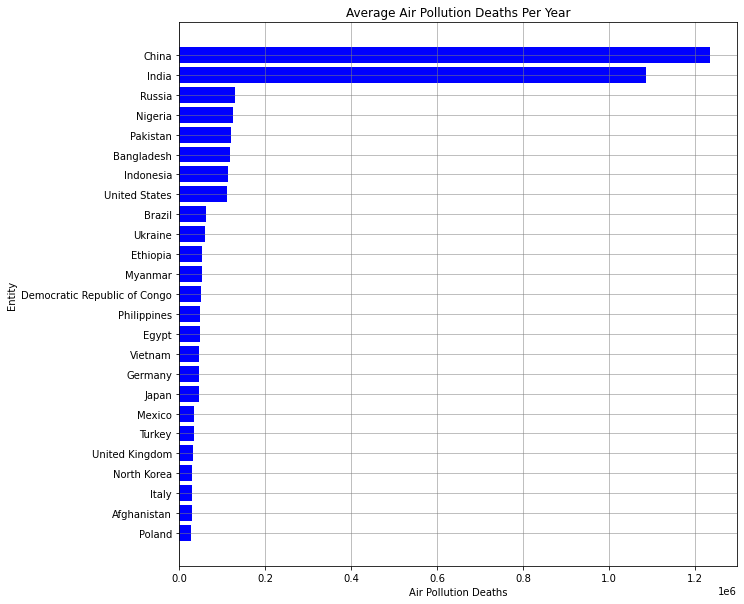

In [122]:
## Creating a bar graph of the countries with the highest average air pollution deaths
## per year.  I noticed that China and India are both over a million, with the closest
## countries behind are still under 200,000.  I decided to make another bar graph without
## China and India to compare the other countries better
plt.figure(figsize=(10,10))
plt.barh("Entity","Air_pollution", data = merged_pollution2, color = "blue")
plt.xlabel("Air Pollution Deaths")
plt.ylabel("Entity")
plt.title("Average Air Pollution Deaths Per Year")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()




In [123]:
## Creating merged_pollution4 to make a bar graph without China and India.
merged_pollution4 = merged_pollution2.drop(merged_pollution2.index[(merged_pollution2['Air_pollution'] >= 1000000)])

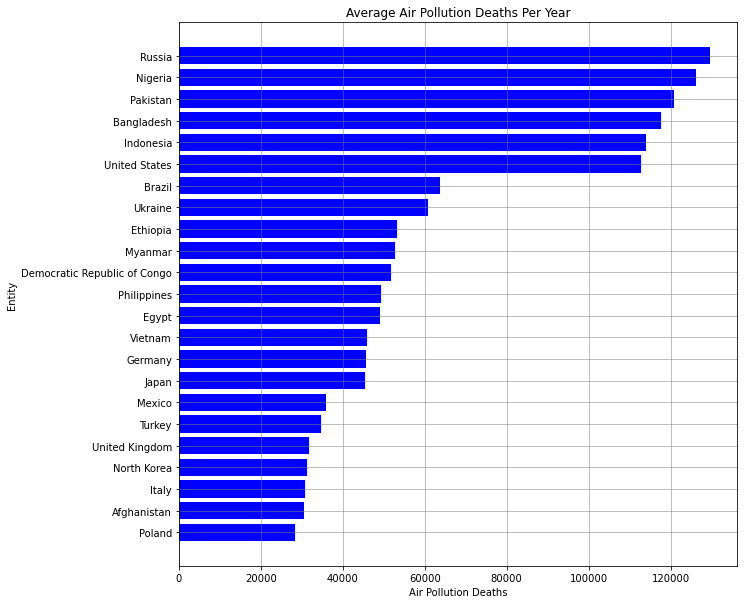

In [124]:
## The countries seem to go in tiers...China and India are way ahead, and then the 2nd tier has Russia,
## Nigeria, Pakistan, Bangladesh, Indonesia and United States way ahead of the rest of the countries.
## Quite a few Asian countries on the list, along with some African and Middle Eastern countries as well.
## The United States is the highest of both Americas (North and South) and higher than all European countries.

plt.figure(figsize=(10,10))
plt.barh("Entity","Air_pollution", data = merged_pollution4, color = "blue")
plt.xlabel("Air Pollution Deaths")
plt.ylabel("Entity")
plt.title("Average Air Pollution Deaths Per Year")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [125]:
## Creating a dataframe of the Top 5 countries with the highest Air pollution deaths
## to see how they compare in terms of Household air pollution deaths.
merged_pollution[merged_pollution['Entity'] == "Bangladesh"]

,Entity,Code,Year,Household_AP,Air_pollution_total,Outdoor_AP,AP_Deaths_%,Household_%,Air_pollution
364,Bangladesh,BGD,1990,103748.32,132403.78,32161.45,11.34,78.36,117576.44
365,Bangladesh,BGD,1991,98419.51,126806.70,31645.73,10.16,77.61,117576.44
366,Bangladesh,BGD,1992,95780.38,124412.45,31941.95,11.54,76.99,117576.44
367,Bangladesh,BGD,1993,91978.93,120693.30,31964.87,11.57,76.21,117576.44
368,Bangladesh,BGD,1994,88870.90,117626.71,31947.27,11.62,75.55,117576.44
369,Bangladesh,BGD,1995,87596.21,116688.67,32318.19,11.71,75.07,117576.44
370,Bangladesh,BGD,1996,85030.46,114453.81,32575.62,11.85,74.29,117576.44
371,Bangladesh,BGD,1997,82837.29,112635.14,32876.57,11.98,73.54,117576.44
372,Bangladesh,BGD,1998,80898.02,111054.10,33202.86,12.11,72.85,117576.44
373,Bangladesh,BGD,1999,79473.96,110373.83,33942.94,12.27,72.00,117576.44


In [126]:
##  merged_pollution5 is dropping all countries below Bangladesh on the list.  
merged_pollution5 = merged_pollution2.drop(merged_pollution2.index[(merged_pollution2['Air_pollution'] <= 117577)])

In [127]:
merged_pollution5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3539 to 952
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               140 non-null    object 
 1   Code                 140 non-null    object 
 2   Year                 140 non-null    int64  
 3   Household_AP         140 non-null    float64
 4   Air_pollution_total  140 non-null    float64
 5   Outdoor_AP           140 non-null    float64
 6   AP_Deaths_%          140 non-null    float64
 7   Household_%          140 non-null    float64
 8   Air_pollution        140 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.9+ KB


In [128]:
## Dropping columns I don't need for my next visual.
merged_pollution5.drop(columns = ["Code", "Outdoor_AP","AP_Deaths_%", "Air_pollution"], inplace=True)

In [129]:
merged_pollution5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3539 to 952
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               140 non-null    object 
 1   Year                 140 non-null    int64  
 2   Household_AP         140 non-null    float64
 3   Air_pollution_total  140 non-null    float64
 4   Household_%          140 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.6+ KB


In [130]:
## Renaming Household_% column because the name didn't work in my line plot.
merged_pollution5.rename(columns={"Household_%": "Household_Percent"}, inplace=True)

In [131]:
merged_pollution5.drop(columns = ["Household_AP", "Air_pollution_total"], inplace=True)

In [132]:
merged_pollution5= merged_pollution5.sort_values(by= ['Entity', 'Year'])

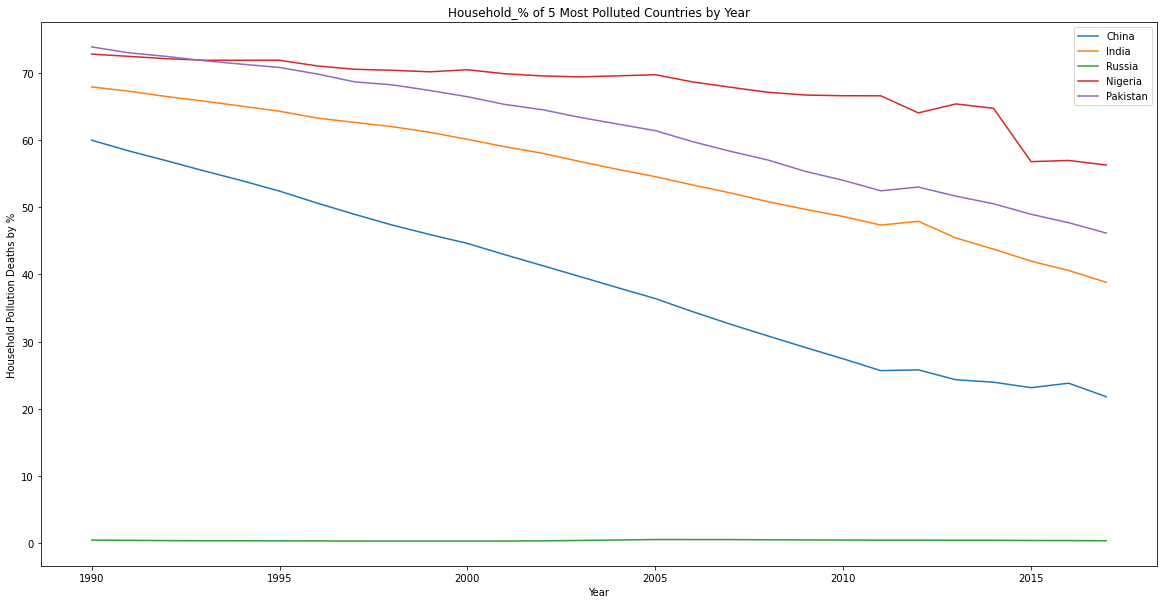

In [133]:
## Looking at the percentage of the Top 5 air pollution death countries that are due
## to household pollution.  All five countries have had a gradual but obvious decline
## in terms of what percentage of air pollution deaths are due to household pollution

a = merged_pollution5.loc[merged_pollution5.Entity == 'China']
b = merged_pollution5.loc[merged_pollution5.Entity == 'India']
c = merged_pollution5.loc[merged_pollution5.Entity == 'Russia']
d = merged_pollution5.loc[merged_pollution5.Entity == 'Nigeria']
e = merged_pollution5.loc[merged_pollution5.Entity == 'Pakistan']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(a.Year, a.Household_Percent)
ax.plot(b.Year, b.Household_Percent)
ax.plot(c.Year, c.Household_Percent)
ax.plot(d.Year, d.Household_Percent)
ax.plot(e.Year, e.Household_Percent)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set_xlabel("Year")
ax.set_ylabel("Household Pollution Deaths by %")
ax.set_title("Household_% of 5 Most Polluted Countries by Year")
ax.legend(['China', 'India', 'Russia', 'Nigeria', 'Pakistan'])

## Answers to the Research Question 1:  
## In terms of which countries have the highest percentage of total deaths due to air pollution, it seems to be mostly Northeastern and Southeastern Asia.
## In terms of which countries have the highest percentage of air pollution deaths due to household pollution, it seems to be mostly African countries.


# Research Question 2: How does the trend of total air pollution deaths from 1990-2017 compare to the trend of air pollution deaths due to household pollution?

In [136]:
## Creating a dataframe that has only the "World" rows so that I can make visuals based on total world data.
world = merged_poll.nlargest(28, ['Air_pollution_total'])

In [140]:
## Sorting world data by Year to compare in visuals
world = world.sort_values(by=['Year'])

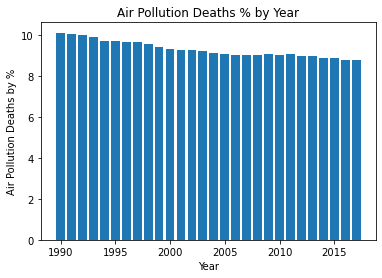

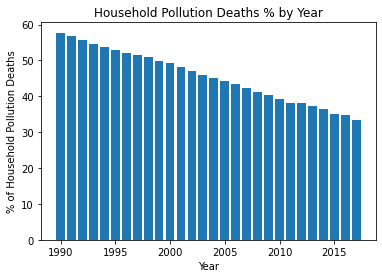

In [139]:
## Comparing the trends of the percentage of total deaths due to air pollution 1990-2017
## to the trends of percentage of air pollution deaths due to household pollution 1990-2017

plt.bar("Year", "AP_Deaths_%", data = world, width=0.8)

plt.xlabel("Year")
plt.ylabel("Air Pollution Deaths by %")
plt.title("Air Pollution Deaths % by Year")

plt.show()

plt.bar("Year", "Household_%", data = world, width=0.8)

plt.xlabel("Year")
plt.ylabel("% of Household Pollution Deaths")
plt.title("Household Pollution Deaths % by Year")

plt.show()



## Answer to Research Question 2: The percentage of total deaths that are air pollution deaths gradually fell from about 10% to just under 9% in 27 years. The percentage of air pollution deaths due to household pollution fell dramatically from nearly 60% to around 35%. I believe that this is due to the fact that much has been done in terms of preventing deaths from household air pollution over the last 27 years.  However, because outdoor air pollution has gotten worse, and the population has gone up...the actual total of air pollution deaths has increased slightly in the last 27 years.

## 5.2: Reflection: If I had more time to complete this project, I would probably focus more on the regional data.  I feel like trying to create visuals based on the countries was difficult due to the fact that there were hundreds of countries which would not fit well on most kinds of visuals.  I would probably drop all of the country data and focus on the data by region...then compare the region data with world data to see the trends for each region of the world. 
## In terms of research questions, I would probably try to see by region the comparison of air pollution deaths, household pollution and outdoor pollution.  I would also supplement this data with actual research into  WHY all of this data is the way it is.  Why has household pollution become far less common, and outdoor pollution much worse than in 1990?
